<a href="https://colab.research.google.com/github/RabeenaRasulla/CODSOFT_TASKS/blob/main/TASK_5_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 5 : Credit Card Fraud Detection

Author : Rabeena R

Batch : December (A95)

Domain : Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  pylab import rcParams
import warnings



In [3]:
intern_df = pd.read_csv('/content/creditcard.csv')

In [4]:
intern_df = intern_df.sample(n=50000,random_state=1)

In [5]:
intern_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55260,46851,-1.911051,-5.393582,-2.338370,1.176090,-1.368562,0.565879,2.305962,-0.496527,-0.139621,...,0.901649,-1.115263,-1.746342,-0.774338,0.074214,0.972705,-0.417556,0.263605,1691.09,0.0
12423,21773,-1.149695,-0.149049,3.451724,-2.043915,-0.440209,1.352875,-0.509357,0.491119,3.688908,...,0.054209,1.036884,-0.531342,-0.281126,0.576517,-0.620885,-0.159750,-0.183100,0.02,0.0
44325,41894,0.951323,-0.939840,0.004193,-1.456638,-0.953245,-0.828716,-0.104509,-0.072592,1.214327,...,0.041019,-0.249683,-0.185084,0.027784,0.315721,-0.135691,-0.031291,0.035132,181.50,0.0
45389,42320,1.152225,-0.045120,0.916435,1.506341,-0.154479,1.107820,-0.450785,0.247554,1.068098,...,-0.456098,-0.738639,-0.033161,-0.728388,0.593733,-0.461767,0.101956,0.022433,4.19,0.0
64243,51085,1.257264,0.319818,0.294030,0.696664,-0.413130,-1.082234,0.052203,-0.175073,0.108343,...,-0.293986,-0.871440,0.135106,0.326151,0.200140,0.096469,-0.026243,0.029612,1.29,0.0
34398,37650,-1.193194,1.283837,1.228262,1.433258,0.071066,-0.667199,2.056656,-0.424263,-1.541573,...,0.038079,0.149288,-0.073241,0.704164,0.447911,-0.119020,-0.105883,0.001187,158.00,0.0
30,24,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0.0
69663,53521,-2.529410,2.387605,-0.935259,-1.789566,2.120722,3.240994,0.248345,0.818638,1.532810,...,-0.639940,-1.097014,0.023916,0.943471,0.458797,0.103078,1.129059,0.571987,8.94,0.0
75821,56270,0.838483,-1.506558,0.618496,-0.539885,-1.656232,-0.415635,-0.682846,0.026645,-0.691548,...,0.322643,0.188437,-0.188119,0.338748,0.118386,-0.340794,-0.027107,0.060519,269.40,0.0
27981,34796,1.135551,0.230988,0.373758,1.166559,-0.295035,-0.684349,0.153432,-0.101792,0.005977,...,0.085906,0.261423,-0.044380,0.404359,0.551611,-0.320108,0.024258,0.023344,26.32,0.0


In [6]:
intern_df.shape

(50000, 31)

In [8]:
intern_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
intern_df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55260,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12423,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64243,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
intern_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
intern_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,37156.698760,-0.250830,-0.034266,0.680412,0.163133,-0.278930,0.089982,-0.116155,0.054456,-0.007317,...,-0.030061,-0.106923,-0.032848,0.008438,0.135504,0.025012,0.001609,0.001028,96.356779,0.002420
std,15160.125675,1.874697,1.635806,1.390595,1.362970,1.377620,1.296741,1.247684,1.248564,1.146666,...,0.746897,0.636334,0.601806,0.595459,0.436581,0.497332,0.390195,0.303957,254.177173,0.049134
min,0.000000,-32.962810,-40.978852,-32.965346,-5.172595,-42.147898,-17.574835,-31.764946,-73.216718,-9.283925,...,-34.830382,-8.555808,-17.530682,-2.836627,-4.541819,-1.440626,-9.390980,-9.617915,0.000000,0.000000
25%,30565.750000,-1.010034,-0.602495,0.190709,-0.729906,-0.900670,-0.644315,-0.603855,-0.141048,-0.684013,...,-0.225362,-0.527768,-0.177252,-0.322152,-0.127136,-0.326791,-0.063070,-0.005996,7.630000,0.000000
50%,39938.500000,-0.237948,0.068467,0.764985,0.180346,-0.311640,-0.157141,-0.074502,0.069274,-0.084332,...,-0.059485,-0.081533,-0.049655,0.064688,0.173019,-0.073865,0.009262,0.022645,26.900000,0.000000
75%,48881.250000,1.154751,0.718356,1.396408,1.045472,0.257746,0.487948,0.417633,0.346664,0.630977,...,0.116579,0.307487,0.080314,0.406220,0.420188,0.306873,0.081880,0.075391,89.000000,0.000000
max,57966.000000,1.656708,18.183626,4.079168,11.927512,24.655965,22.529298,36.677268,20.007208,10.370658,...,22.599543,10.503090,18.946734,4.014444,5.521140,3.087444,11.135740,15.374949,11898.090000,1.000000


In [15]:
intern_df['Class'].value_counts()

,count
Class,
0.0,49879
1.0,121


In [16]:
intern_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 55260 to 70413
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  int64  
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22 

In [17]:
fraud=intern_df[intern_df['Class']==1]
genuine=intern_df[intern_df['Class']==0]
fraud.Amount.describe()

,Amount
count,121.000000
mean,87.050413
std,167.143885
min,0.000000
25%,1.000000
50%,7.520000
75%,99.990000
max,802.520000


In [18]:
genuine.Amount.describe()

,Amount
count,49879.000000
mean,96.379355
std,254.352788
min,0.000000
25%,7.680000
50%,26.900000
75%,89.000000
max,11898.090000


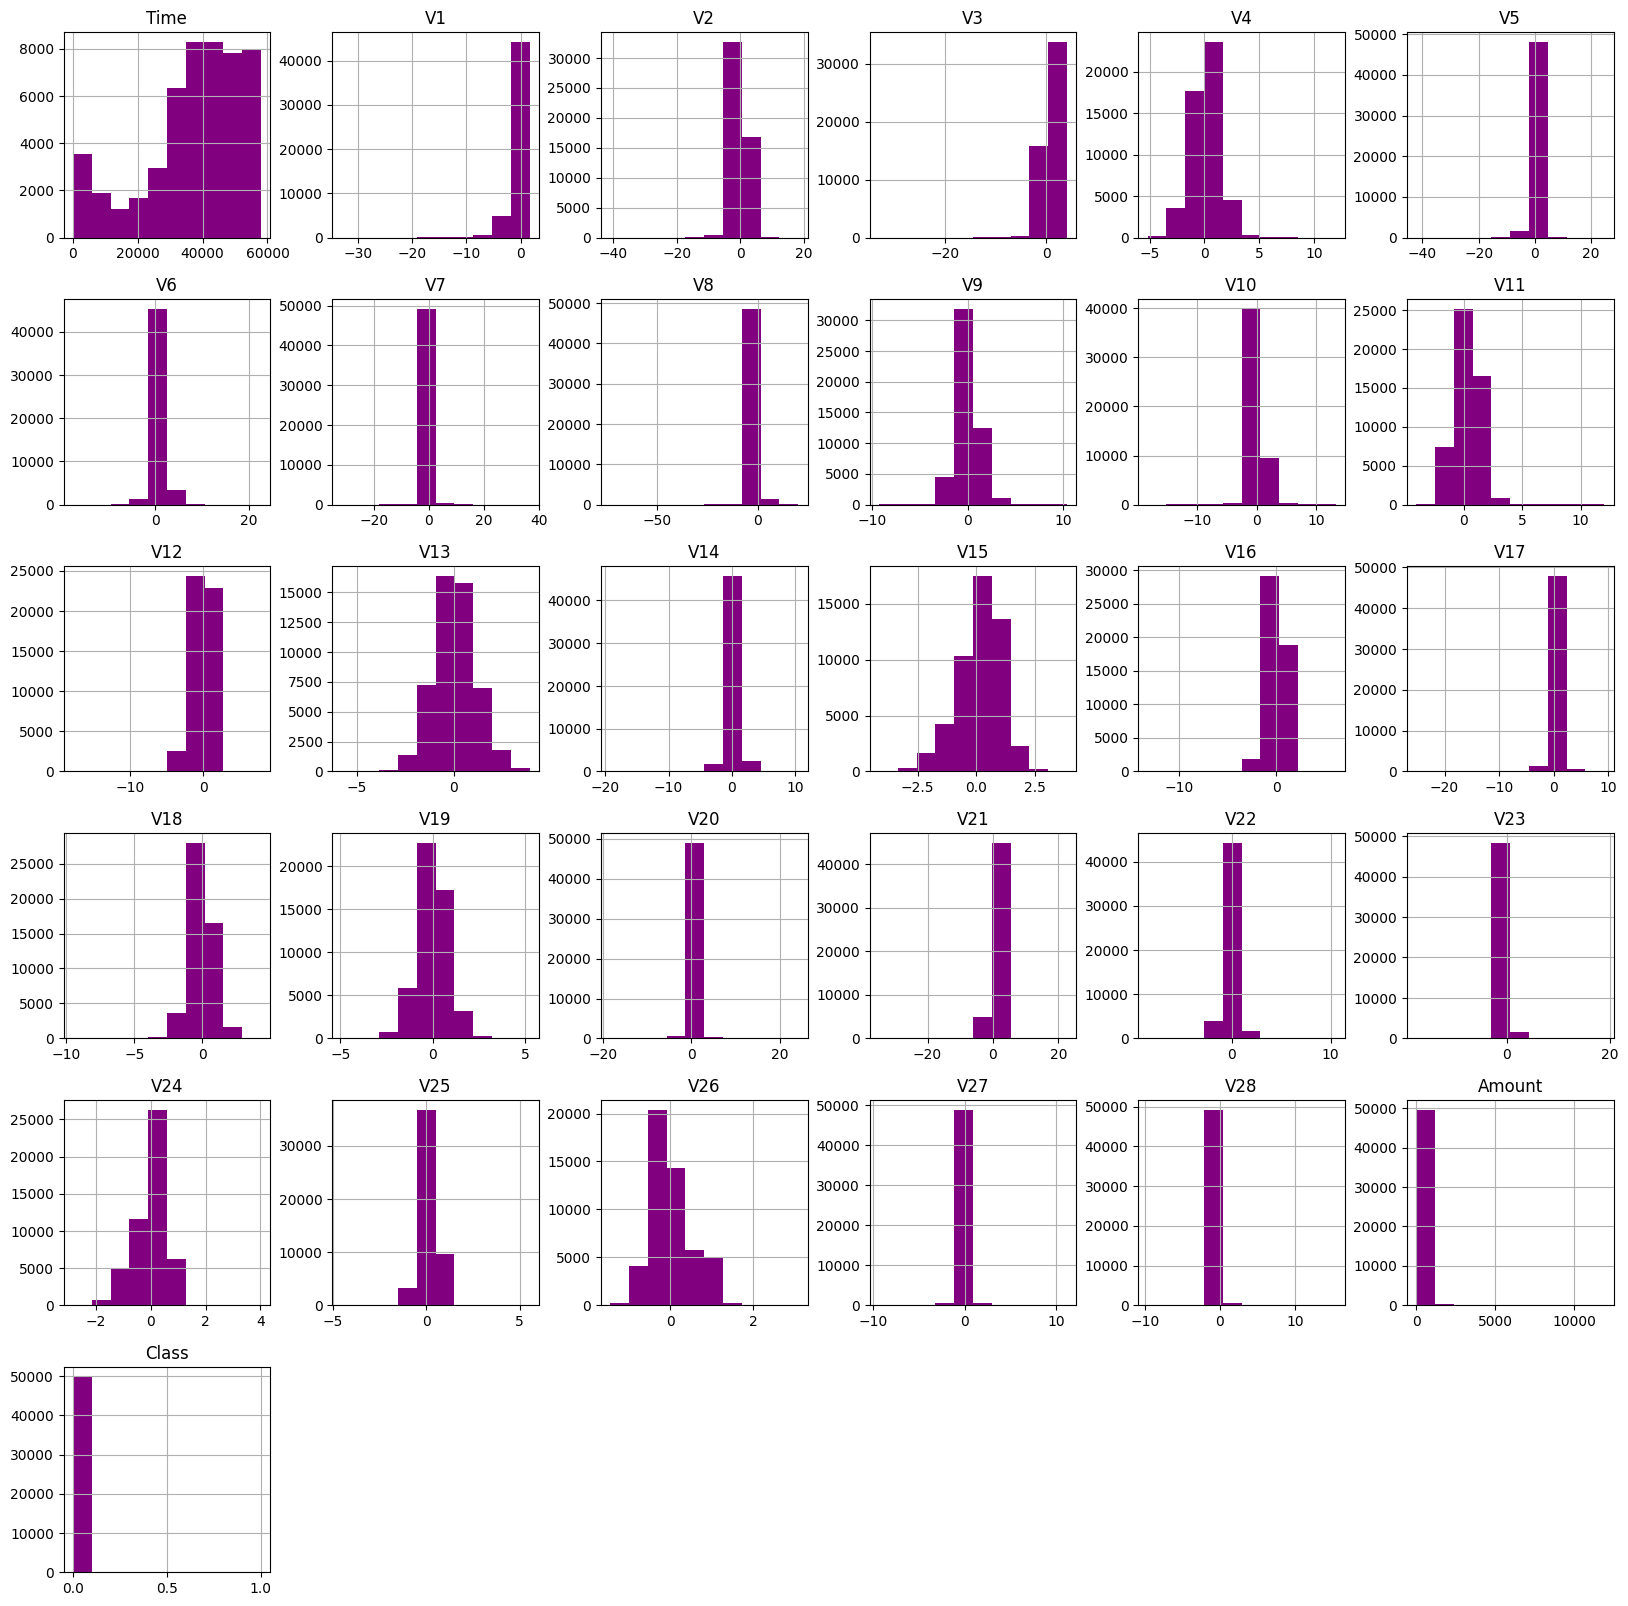

In [20]:
intern_df.hist(figsize=(20,20),color='Purple')
plt.show()

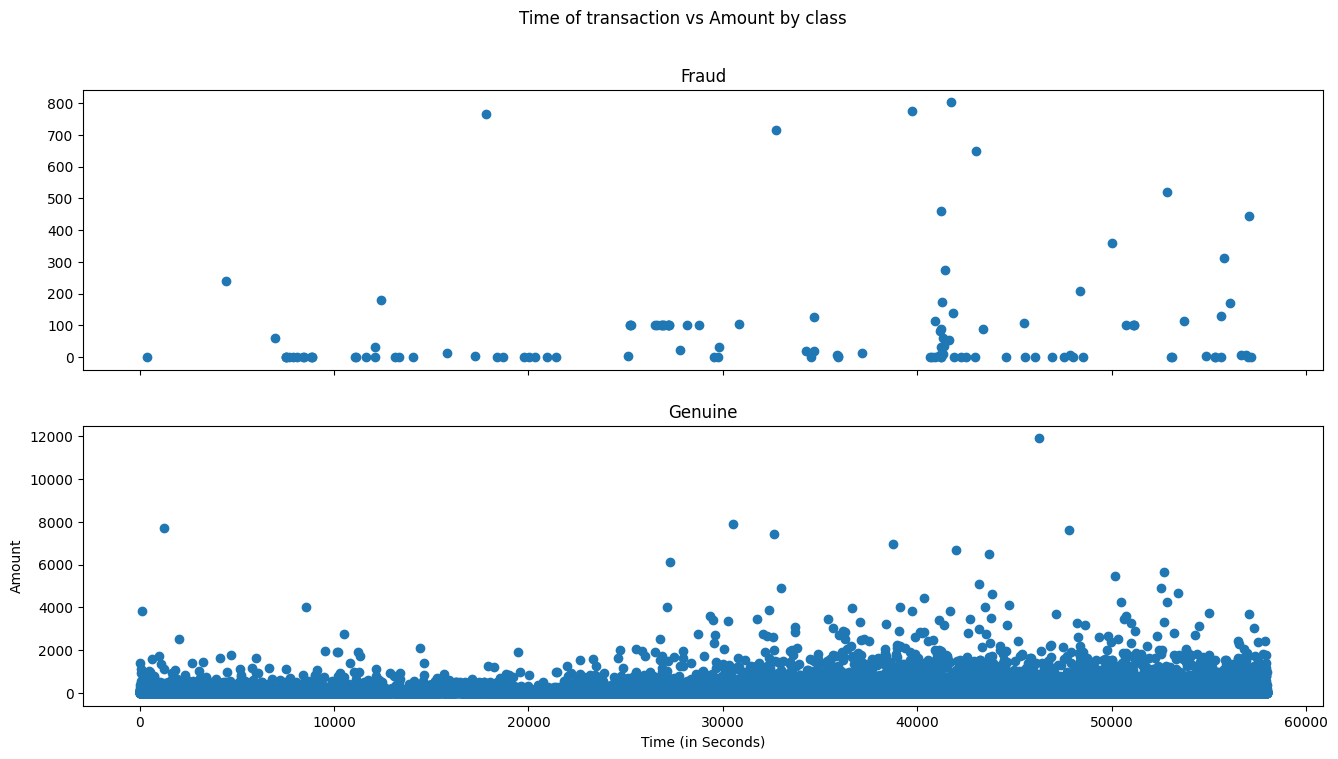

In [21]:
rcParams['figure.figsize'] = 16, 8
f, (ax1, ax2) = plt.subplots (2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud. Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine. Time, genuine. Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()
